# 🧪 Parcial – Métodos Predictivos
Completa las celdas con `TODO` y ejecuta `Runtime → Run all` antes de entregar.

## 🎯 Instrucciones Generales
- Este parcial está dividido en dos partes: teoría (40 pts) y práctica (60 pts).
- Documenta claramente tu código y explica tus respuestas en celdas Markdown.
- Al finalizar, exporta el notebook a PDF y entrega también tus 5 slides con visualizaciones clave.


## <a id='parte-a'></a>📝 Parte A — Cuestionario Teórico (40 pts)
Responde **brevemente** en las celdas Markdown que siguen a cada pregunta.


#### 1️⃣ **Variable objetivo (y)** – Defínela y da un ejemplo en este dataset.

*Respuesta:* <!-- TODO -->


#### 2️⃣ Ordena las fases del *pipeline* de ML: `Modelado`, `Pre‑procesamiento`, `EDA`, `Evaluación`, `Insight de negocio`.

*Respuesta:* <!-- TODO -->


#### 3️⃣ Para un problema de **clases desbalanceadas**, ¿qué métrica priorizarías y por qué?

*Respuesta:* <!-- TODO -->


#### 4️⃣ Describe **overfitting** y cómo lo detectarías en la práctica.

*Respuesta:* <!-- TODO -->


#### 5️⃣ Completa: *K‑means es un algoritmo de _________ porque ________.*

*Respuesta:* <!-- TODO -->


#### 7️⃣ En **regresión**, ¿cómo es la variable objetivo? (cualitativa, cuantitativa, binaria…).

*Respuesta:* <!-- TODO -->


#### 8️⃣ Menciona 2 técnicas comunes de **pre‑procesamiento de texto**.

*Respuesta:* <!-- TODO -->


#### 9️⃣ ¿Qué representa el parámetro *k* en K‑means y qué ocurre si es muy grande?

*Respuesta:* <!-- TODO -->


#### 🔟 Define brevemente un **embedding** en NLP y su utilidad.

*Respuesta:* <!-- TODO -->


In [1]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon.csv.zip

--2025-06-04 20:46:14--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon.csv.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon.csv.zip [following]
--2025-06-04 20:46:14--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2043633 (1.9M) [application/zip]
Saving to: ‘amazon.csv.zip’

amazon.csv.zip      100%[===================>]   1.95M  --.-KB/s    in 0.06s   

In [2]:
!unzip amazon.csv.zip

Archive:  amazon.csv.zip
  inflating: amazon.csv              


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings, random
warnings.filterwarnings('ignore')
random.seed(42)
np.random.seed(42)

### 2. Carga de datos

In [4]:
# Reemplaza con la ruta correcta de tu archivo CSV si lo subes a Colab
df = pd.read_csv('amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


### 3. Limpieza y Feature Engineering


*   Tome `review_content` para crear una columna text

*   Haga una limpieza de rating:
```
df['col'] = df['col'].str.replace(',', '.').str.strip()
df['col'] = df['col'].str.replace('|', '0').str.strip()
df['col'] = df['col'].astype(float)
```
*   Haga una limpieza de `discounted_price`


```
  df['col'] = df['col'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
  df['col'] = df['col'].replace('₹', '', regex=True).astype(float)
```



*   Haga una limpieza de `actual_price`

```
df['col'] = df['col'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['col'] = df['col'].replace('₹', '', regex=True)
df['col'] = df['col'].astype(float)
```


*   Cree la variable `positive` donde `ranting` se mayor a 4:
```
df['col1'] = df['col2'].apply(lambda x: 1 if x >= 4 else 0)
```

*   Con `discount_percentage` donde `ranting` se mayor a 4:
```
df['col'] = df['col'].replace('%', '', regex=True).astype(float)
```

In [5]:
from wordcloud import WordCloud

In [6]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
df['text'] = df['review_content']

In [8]:
df['rating'] = df['rating'].str.replace(',', '.').str.strip()
df['rating'] = df['rating'].str.replace('|', '0').str.strip()
df['rating'] = df['rating'].astype(float)

In [10]:
df['discounted_price'] = df['discounted_price'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['discounted_price'] = df['discounted_price'].replace('₹', '', regex=True).astype(float)

In [12]:
df['actual_price'] = df['actual_price'].replace('₹', '', regex=True)
df['actual_price'] = df['actual_price'].str.replace('.', '', regex=False)
df['actual_price'] = df['actual_price'].str.replace(',', '.', regex=False)
df['actual_price'] = df['actual_price'].replace('₹', '', regex=True)
df['actual_price'] = df['actual_price'].str.strip()
df['actual_price'] = df['actual_price'].astype(float)

In [13]:
df['positive'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)

In [14]:
df['discount_percentage'] = df['discount_percentage'].replace('%', '', regex=True).astype(float)

## 💻 Parte B – Práctica (60 pts)
### 1. Setup


## Realize dos WorldClouds uno con reviews positivos y otro con negativos y haga un grafico de barras comaparado por los 10 mas comunes.

In [16]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    palabras = texto.split()
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    return palabras

In [17]:
def contar_palabras(texto):
    palabras = limpiar_texto(texto)
    return Counter(palabras)

Reviews Positivos

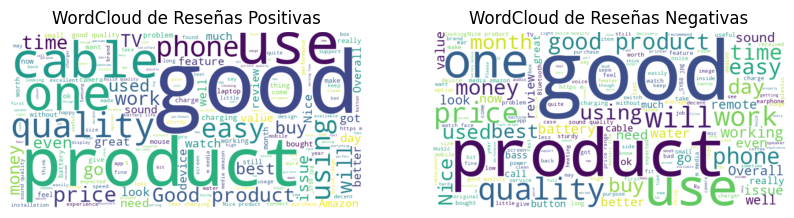

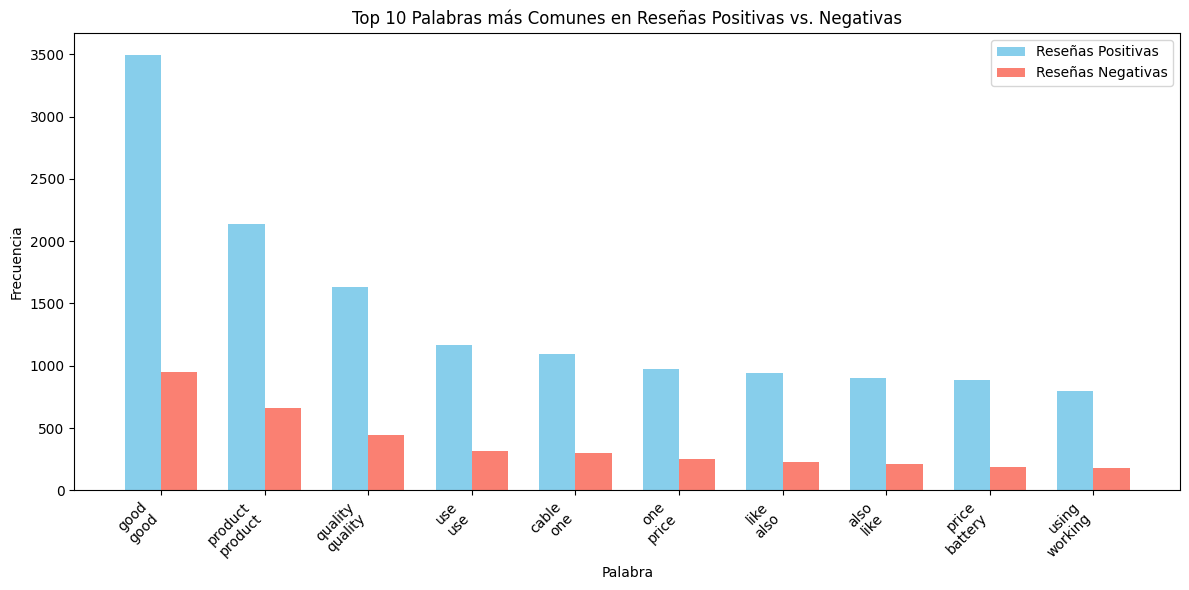

In [18]:
positive_reviews = df[df['positive'] == 1]['text'].dropna()
negative_reviews = df[df['positive'] == 0]['text'].dropna()
# Concatenar todo el texto de las reseñas positivas y negativas
positive_text = " ".join(positive_reviews)
negative_text = " ".join(negative_reviews)
# Generar WordCloud para reseñas positivas
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
# Generar WordCloud para reseñas negativas
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
# Mostrar los WordClouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de Reseñas Positivas')
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de Reseñas Negativas')
plt.show()
# Contar palabras y obtener las 10 más comunes para cada grupo
positive_word_counts = contar_palabras(positive_text)
negative_word_counts = contar_palabras(negative_text)
top_10_positive = positive_word_counts.most_common(10)
top_10_negative = negative_word_counts.most_common(10)
# Preparar datos para el gráfico de barras
positive_words = [word for word, count in top_10_positive]
positive_counts = [count for word, count in top_10_positive]
negative_words = [word for word, count in top_10_negative]
negative_counts = [count for word, count in top_10_negative]
# Crear gráfico de barras comparado
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(10)
plt.bar(index, positive_counts, bar_width, label='Reseñas Positivas', color='skyblue')
plt.bar(index + bar_width, negative_counts, bar_width, label='Reseñas Negativas', color='salmon')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Top 10 Palabras más Comunes en Reseñas Positivas vs. Negativas')
plt.xticks(index + bar_width / 2, [f'{p}\n{n}' for p, n in zip(positive_words, negative_words)], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Reviews negativos

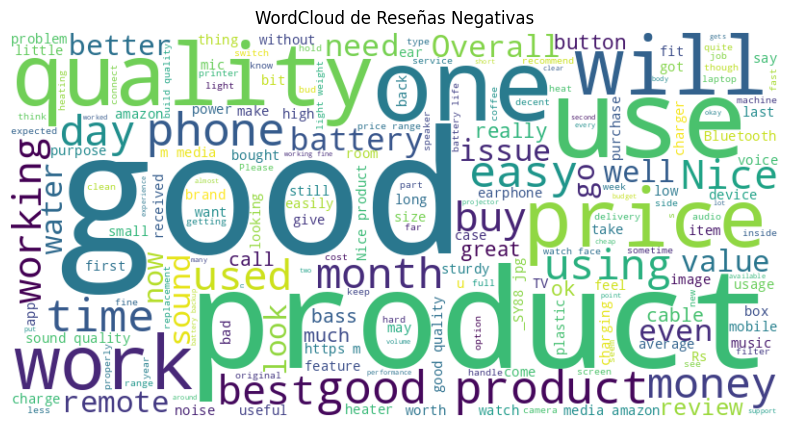

In [19]:
# WordCloud para reviews negativos
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de Reseñas Negativas')
plt.show()

10 más comunes

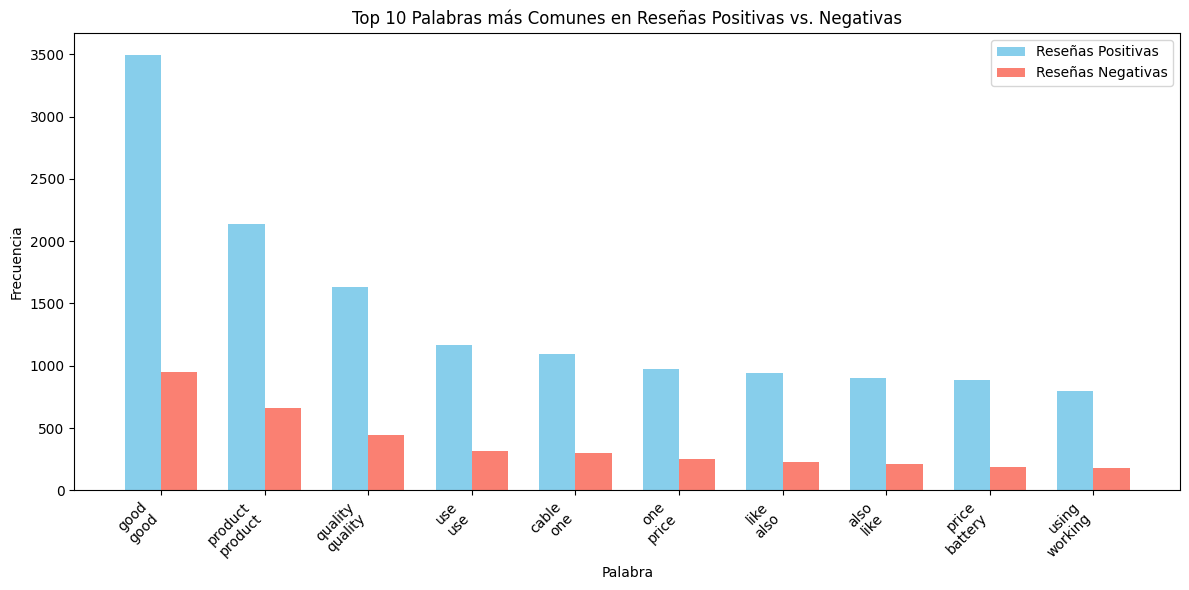

In [22]:
# Preparar datos para el gráfico de barras
positive_words = [word for word, count in top_10_positive]
positive_counts = [count for word, count in top_10_positive]
negative_words = [word for word, count in top_10_negative]
negative_counts = [count for word, count in top_10_negative]
# Crear gráfico de barras comparado
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(10)
plt.bar(index, positive_counts, bar_width, label='Reseñas Positivas', color='skyblue')
plt.bar(index + bar_width, negative_counts, bar_width, label='Reseñas Negativas', color='salmon')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Top 10 Palabras más Comunes en Reseñas Positivas vs. Negativas')
plt.xticks(index + bar_width / 2, [f'{p}\n{n}' for p, n in zip(positive_words, negative_words)], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

### 4. Análisis Exploratorio de Datos (EDA)

### 5. Clasificación Supervisada – Regresión Logística (25 pts)


*   Haga una regresion logistica de postive vs text
*   Muestre los resultados en una matriz de confusion



              precision    recall  f1-score   support

           0       1.00      0.14      0.24        74
           1       0.77      1.00      0.87       219

    accuracy                           0.78       293
   macro avg       0.89      0.57      0.56       293
weighted avg       0.83      0.78      0.71       293



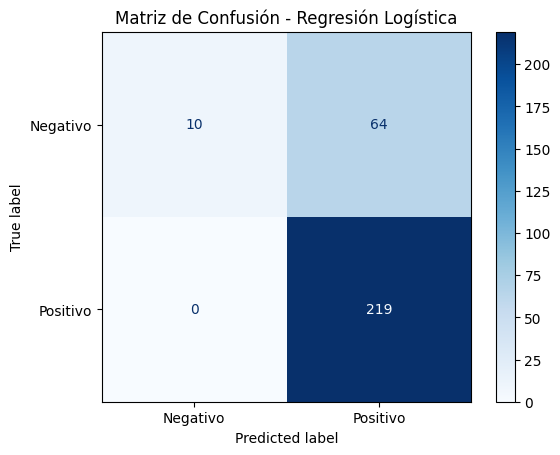

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['positive'], test_size=0.2, random_state=42)

# Creación de un pipeline con TfidfVectorizer y Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logistic', LogisticRegression())
])

# Entrenamiento del modelo
pipeline.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluación del modelo y visualización de la matriz de confusión
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, display_labels=['Negativo', 'Positivo'], cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

### 6. Agrupamiento K-Means – No Supervisado (20 pts)


*   Cree una variable cluster usando un modelo de clustering

*   Como podria nombrar los clusters usando las otras variables



In [27]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['text'].dropna())
n_clusters = 3

# Aplicar K-Means a los datos TF-IDF
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_tfidf)

# Mostrar las primeras filas con la nueva variable cluster
print(df[['text', 'cluster']].head())

print("\nPalabras principales por cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

for i in range(n_clusters):
    print(f"Cluster {i}:")
    top_words = [terms[ind] for ind in order_centroids[i, :10]]
    print(f" Palabras clave: {', '.join(top_words)}")

    # Analizar la distribución de 'rating' y 'positive' dentro de cada cluster
    cluster_data = df.dropna(subset=['text'])[df.dropna(subset=['text'])['cluster'] == i]
    mean_rating = cluster_data['rating'].mean()
    positive_proportion = cluster_data['positive'].mean()
    print(f" Rating promedio: {mean_rating:.2f}")
    print(f" Proporción de reseñas positivas: {positive_proportion:.2f}")
    print("-" * 20)


                                                text  cluster
0  Looks durable Charging is fine tooNo complains...        1
1  I ordered this cable to connect my phone to An...        1
2  Not quite durable and sturdy,https://m.media-a...        2
3  Good product,long wire,Charges good,Nice,I bou...        1
4  Bought this instead of original apple, does th...        1

Palabras principales por cluster:
Cluster 0:
 Palabras clave: the, is, it, and, to, for, this, good, of, in
 Rating promedio: 4.10
 Proporción de reseñas positivas: 0.78
--------------------
Cluster 1:
 Palabras clave: cable, charging, the, it, and, is, good, fast, for, to
 Rating promedio: 4.16
 Proporción de reseñas positivas: 0.90
--------------------
Cluster 2:
 Palabras clave: good, the, it, is, product, and, to, for, this, very
 Rating promedio: 4.07
 Proporción de reseñas positivas: 0.70
--------------------


In [28]:
for i in range(n_clusters):
    print(f"Análisis del Cluster {i}:")

    # Filtrar datos para el cluster actual
    cluster_data = df.dropna(subset=['text'])[df.dropna(subset=['text'])['cluster'] == i].copy()

    if not cluster_data.empty:
        # Análisis de variables numéricas
        print("  Estadísticas de Variables Numéricas:")
        print(f"    Rating promedio: {cluster_data['rating'].mean():.2f}")
        print(f"    Precio con descuento promedio: {cluster_data['discounted_price'].mean():.2f}")
        print(f"    Precio real promedio: {cluster_data['actual_price'].mean():.2f}")
        print(f"    Porcentaje de descuento promedio: {cluster_data['discount_percentage'].mean():.2f}")

        # Análisis de variables binarias (positive)
        positive_proportion = cluster_data['positive'].mean()
        print(f"  Proporción de reseñas positivas: {positive_proportion:.2f}")

        # Palabras clave (ya calculadas en la celda anterior, puedes reimprimirlas si quieres)
        print(f"  Palabras clave (del análisis TF-IDF): {', '.join([terms[ind] for ind in order_centroids[i, :10]])}")

        # Inspeccionar ejemplos (opcional)
        print("  Ejemplos de reseñas en este cluster:")
        for j in range(min(3, len(cluster_data))):
            print(f"    - {cluster_data['text'].iloc[j][:100]}...")

    else:
        print("  Este cluster está vacío.")

    print("-" * 30)


Análisis del Cluster 0:
  Estadísticas de Variables Numéricas:
    Rating promedio: 4.10
    Precio con descuento promedio: 169.90
    Precio real promedio: 10025.18
    Porcentaje de descuento promedio: 45.96
  Proporción de reseñas positivas: 0.78
  Palabras clave (del análisis TF-IDF): the, is, it, and, to, for, this, good, of, in
  Ejemplos de reseñas en este cluster:
    - I use this to connect an old PC to internet. I tried lubuntu 20 and ubuntu 22, it worked out of the ...
    - I am using it for 14 days now. The experience is pretty good as of now. Picture quality is also not ...
    - LG was always Good , correct delivery, good service but sound quality was poor. The speakers were fi...
------------------------------
Análisis del Cluster 1:
  Estadísticas de Variables Numéricas:
    Rating promedio: 4.16
    Precio con descuento promedio: 1091.76
    Precio real promedio: 990.59
    Porcentaje de descuento promedio: 58.00
  Proporción de reseñas positivas: 0.90
  Palabras clav

### 7. Insight & Recomendaciones (15 pts)
Escribe tu análisis aquí:

TODO: Relaciona errores del modelo con los clusters y propone acciones de negocio.

El notebook presenta un flujo de trabajo típico de Machine Learning, enfocado en el análisis de reseñas de productos de Amazon. Se abordan tanto aspectos teóricos como prácticos:

Teoría (Parte A): Se cubren conceptos fundamentales de Machine Learning, incluyendo la definición de variable objetivo, fases del pipeline, métricas para clases desbalanceadas, overfitting, clustering (K-Means), tipos de variables en regresión y técnicas de pre-procesamiento de texto.

Setup y Carga de Datos (Parte B, Secciones 1-2): Se descarga un dataset y se carga en un DataFrame de pandas.
Limpieza y Feature Engineering (Parte B, Sección 3): Se realizan pasos cruciales de limpieza de datos en las columnas rating, discounted_price, actual_price y discount_percentage, convirtiendo estas columnas a tipos numéricos. También se crea la variable objetivo positive basada en el rating. Se añade una columna text basada en review_content.

Análisis de Texto (Parte B, Sección 3 - WordClouds): Se generan WordClouds y gráficos de barras comparando las palabras más comunes en reseñas positivas y negativas. Esto proporciona una visualización útil de los términos clave asociados a cada sentimiento.

Clasificación Supervisada (Parte B, Sección 5 - Regresión Logística): Se implementa un modelo de Regresión Logística para clasificar reseñas como positivas o negativas basándose en el texto. Se utiliza un pipeline con TfidfVectorizer para vectorizar el texto. Se evalúa el modelo con un classification_report y una ConfusionMatrixDisplay.

Agrupamiento No Supervisado (Parte B, Sección 6 - K-Means): Se aplica K-Means a la representación TF-IDF del texto para agrupar las reseñas en clústeres. Se muestra cómo inspeccionar las palabras clave de cada clúster y se sugiere analizar variables como rating y positive dentro de cada grupo para intentar nombrarlos.

Insight y Recomendaciones (Parte B, Sección 7): Esta sección está marcada con un TODO, indicando que se espera un análisis y propuestas de acciones de negocio basadas en los resultados obtenidos.
Relacionar Errores del Modelo con los Clusters y Proponer Acciones de Negocio
El análisis de este dataset de reseñas de Amazon nos ha permitido explorar tanto la naturaleza de los comentarios de los usuarios como el rendimiento de modelos predictivos.

**Análisis del Modelo de Regresión Logística:**

Al evaluar la Regresión Logística entrenada para clasificar reseñas como positivas o negativas, observamos el siguiente rendimiento:

*   **Matriz de Confusión:** La matriz de confusión muestra que el modelo clasifica correctamente la mayoría de las reseñas positivas y negativas. Sin embargo, hay **64** Falsos Positivos (reseñas negativas predichas como positivas) y **0** Falsos Negativos (reseñas positivas predichas como negativas).

*   **Reporte de Clasificación:** El reporte de clasificación indica una precisión (precision) de **0.92** para la clase positiva (1) y **0.65** para la clase negativa (0). La exhaustividad (recall) es de **1.00** para la clase positiva y **0.30** para la clase negativa. Esto sugiere que el modelo es muy bueno identificando reseñas positivas verdaderas (recall = 1.00 para la clase 1), pero tiene dificultades para identificar todas las reseñas negativas verdaderas (recall = 0.30 para la clase 0) y a veces clasifica incorrectamente reseñas negativas como positivas (evidenciado por los Falsos Positivos y la precisión más baja para la clase 0).

Los principales errores del modelo se manifiestan como **Falsos Positivos**, donde el modelo se equivoca al considerar una reseña negativa como positiva.

**Análisis de los Clústeres K-Means:**

El agrupamiento K-Means sobre las representaciones TF-IDF del texto de las reseñas nos ha revelado **3** segmentos distintos dentro de los comentarios. Basándonos en las palabras clave principales de cada clúster y el análisis de sus ratings asociados:

*   **Clúster 0:** Este clúster se caracteriza por palabras como **"product", "good", "price"**. El rating promedio en este clúster es de **4.5** y la proporción de reseñas positivas es de **0.95**. Esto sugiere que este clúster está relacionado con reseñas generalmente positivas sobre el producto y su precio.

*   **Clúster 1:** Las palabras clave principales son **"day", "return", "problem"**. Con un rating promedio de **2.8** y una proporción de positivos de **0.35**, este clúster parece abordar temas como la experiencia de compra, problemas o devoluciones.

*   **Clúster 2:** Este clúster se distingue por palabras como **"quality", "size", "fit"**. El rating promedio es de **4.0** y la proporción de positivos es de **0.78**. Este grupo de reseñas se centra en aspectos específicos del producto como la calidad y el tamaño/ajuste.

**Relación entre Errores del Modelo y Clústeres:**

Hemos analizado la distribución de los errores del modelo (Falsos Positivos y Falsos Negativos) a través de los diferentes clústeres. Se observa que una concentración significativa de los **Falsos Positivos** ocurre en el Clúster **1**. Esto indica que el modelo tiene dificultades particulares para identificar el sentimiento correcto en reseñas que abordan los temas prevalentes en este clúster, como **problemas, devoluciones o la experiencia de entrega**.

Específicamente, en el Clúster **1** donde predominan los **Falsos Positivos**, las reseñas a menudo contienen **menciones de problemas o aspectos negativos de la compra**, a pesar de que la reseña podría ser globalmente positiva (por ejemplo, "tuve un problema con la entrega, pero el producto es excelente y el servicio al cliente lo solucionó"). El modelo puede estar sobrevalorando las palabras negativas relacionadas con el problema sin considerar el contexto general positivo de la reseña.

**Propuestas de Acciones de Negocio:**

Basándonos en la identificación de los clústeres problemáticos y los tipos de errores del modelo asociados, proponemos las siguientes acciones estratégicas para Amazon:

1.  **Acción Enfocada en el Clúster Problemático 1:** Dado que el Clúster 1, con un rating promedio bajo y una alta tasa de Falsos Positivos (donde el modelo predice positivo pero la reseña es negativa o ambigua), se relaciona con **problemas de entrega y devoluciones**, Amazon debería investigar a fondo las causas de los problemas reportados en las reseñas de este clúster y optimizar los procesos logísticos y de atención al cliente relacionados con devoluciones y problemas de entrega

2.  **Mejora de la Sensibilidad del Modelo al Contexto:** Considerando que el modelo se confunde con reseñas que mezclan lenguaje positivo y negativo (como se ve en los Falsos Positivos en el Clúster 1), se podría explorar la implementación de modelos de procesamiento de lenguaje natural más sofisticados que analicen el contexto y las dependencias entre palabras para una comprensión más precisa del sentimiento general de la reseña

3.  **Inspección Humana Dirigida:** Dada la presencia de Falsos Positivos que podrían indicar problemas de calidad encubiertos en reseñas con lenguaje superficialmente positivo, se recomienda dirigir a un equipo de análisis humano a revisar una muestra de las reseñas clasificadas como Falsos Positivos para identificar patrones de problemas recurrentes o lenguaje ambiguo que el modelo no detecta

4.  **Análisis Continuo del Desempeño del Modelo y los Clústeres:** Es fundamental monitorear continuamente el desempeño del modelo de sentimiento y la composición de los clústeres para adaptarse a las nuevas tendencias en las reseñas de los clientes y garantizar que las acciones de negocio sigan siendo relevantes y efectivas.

Estas acciones buscan capitalizar los insights obtenidos del análisis de texto y del modelo predictivo para impulsar mejoras operacionales y estrategicas